In [182]:
import pandas as pd
episodeDetails = pd.read_pickle('episode_details.pkl')

In [183]:
# Data Clean-up
# Remove row 50, 71
# As these rows are duplicates and smaller
episodeDetails = episodeDetails.drop([50, 71])
# Fix the date for a set row, as it's wrong
episodeDetails.at[588, 'Release Date'] = episodeDetails.iloc[586].Title

In [184]:
episodeDetails.head()

,Episode Code,Title,Release Date,Body Text
0,m0017cry,"Lord Blunkett, David Davis MP, Nancy Fielder, ...",20 May 2022,Chris Mason presents political debate and disc...
1,m00174ld,"Catrina Davies, Jim McMahon MP, Selaine Saxby ...",13 May 2022,Chris Mason presents political debate and disc...
2,m0016y66,"Bim Afolami MP, Dame Margaret Beckett MP, Hele...",06 May 2022,Chris Mason presents political debate and disc...
3,m0016ppj,"Dr Stephen Farry MP, John Finucane MP, Claire ...",29 Apr 2022,Chris Mason presents political debate and disc...
4,m0016hj0,"Sir Geoffrey Clifton-Brown MP, Dame Meg Hillie...",22 Apr 2022,Anita Anand presents political debate and disc...


In [185]:
import spacy
from spacy import displacy         

def extract_host(text):
    nlp = spacy.load("en_core_web_md")     
    sep = "Producer"
    stripped = text.split(sep, 1)[0]                                                                                                            
    sents = nlp(stripped)
    #displacy.render(sents, style="ent")   
    
    host= ""  
    
    host = [str(i) for i in ([ee for ee in sents.ents if ee.label_ == 'PERSON'])][0]
    print("Hosts: " + str(host))  
    
    return host 

def extract_names(text):
    nlp = spacy.load("en_core_web_md")     
    sep = "Producer"
    stripped = text.split(sep, 1)[0]                                                                                                            
    sents = nlp(stripped)
    displacy.render(sents, style="ent")
    
    # Return names
    names = ""
    
    # Remove any elements in list that are locations from nlp_wk
    nlp_wk = spacy.load('xx_ent_wiki_sm')                                                                                                                
    sents_wk = nlp_wk(stripped)
    locs = [str(i) for i in ([ee for ee in sents_wk.ents if ee.label_ == 'LOC'])]
    print("LOCs: " + str(locs))
    
    names = [str(i) for i in ([ee for ee in sents.ents if ee.label_ == 'PERSON'])]
    print("Names: " + str(names))
    
    no_loc_names = [x for x in names if x not in locs]
    
    return no_loc_names

In [186]:
text = episodeDetails.iloc[20]['Body Text']
extract_host(text)

Hosts: Chris Mason


'Chris Mason'

In [187]:
def extract_location(text):
    nlp_wk = spacy.load('xx_ent_wiki_sm')     
    sep = "Producer"
    stripped = text.split(sep, 1)[0]                                                                                                            
    sents = nlp_wk(stripped)
    
    # Return Location
    location = ""
    
    # Location extraction logic
    loc_check = [ee for ee in sents.ents if ee.label_ == 'LOC']
    print("LOCs: " + str(loc_check))
    if loc_check != []:
        print("We have LOC: " + str(len(loc_check)))
        
        # We should filter, so we only have loc's before the first non-loc
        s = list([ee for ee in sents.ents])
        s_labels = list([ee.label_ for ee in sents.ents])
        
        # find the first loc, iterate until difference
        first_loc = s_labels.index('LOC')
        end_of_loc = first_loc
        
        for i in range(first_loc, len(s_labels)):
            if s_labels[i] == 'LOC':
                end_of_loc += 1
            else:
                break
        
        before_first_loc = list(sents.ents)
        before_first_loc = before_first_loc[:before_first_loc.index(loc_check[0])]
        org_check = [ee for ee in before_first_loc if ee.label_ == 'ORG']
        print("ORGs: " + str(org_check))
        if org_check == []:
            # check if we have MISCs before it
            misc_check = [ee for ee in before_first_loc if ee.label_ == 'MISC']
            print("MISCs: " + str(misc_check))
            if misc_check == []:
                location = str(', '.join(str(e) for e in s[first_loc:end_of_loc]))
            else:
                location = str(misc_check[len(misc_check)-1]) + ", " + str(', '.join(str(e) for e in s[first_loc:end_of_loc]))
        else:
            print("We have ORG: " + str(len(org_check)))
            location = str(org_check[len(org_check) - 1]) + ", " + str(', '.join(str(e) for e in s[first_loc:end_of_loc]))
    else:
        # We have detected no locations in the text
        # So we return the first org
        location = [ee for ee in sents.ents if ee.label_ == 'ORG'][0]
        
    # location shouldn't have a newline, let's strip after that
    location = str(location).split("\n", 1)[0]  
    # location shouldn't have trailing spaces
    location = str(location).rstrip()
    return location

text = episodeDetails.iloc[20]['Body Text']

nlp_wk = spacy.load('xx_ent_wiki_sm')
doc = nlp_wk(text)
displacy.render(doc, style="ent")

extract_location(text)

LOCs: [St Luke's School]
We have LOC: 1
ORGs: []
MISCs: []


"St Luke's School"

In [188]:
episodeDetails['Host'] = episodeDetails.apply(lambda row : extract_host(row['Body Text']), axis = 1)

Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Anita Anand
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Edward Stourton
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: Chris Mason
Hosts: C

In [220]:
# Fix errors in the Host discovery process
episodeDetails.at[217, 'Host'] = 'Jonathan Dimbleby'
episodeDetails.at[406, 'Host'] = 'Jonathan Dimbleby'
episodeDetails.at[476, 'Host'] = 'Jonathan Dimbleby'

In [221]:
episodeDetails.to_pickle('episode_details_with_host.pkl')

In [222]:
episodeDetails = pd.read_pickle('episode_details_with_host.pkl')

In [223]:
episodeDetails.head()

,Episode Code,Title,Release Date,Body Text,Host
0,m0017cry,"Lord Blunkett, David Davis MP, Nancy Fielder, ...",20 May 2022,Chris Mason presents political debate and disc...,Chris Mason
1,m00174ld,"Catrina Davies, Jim McMahon MP, Selaine Saxby ...",13 May 2022,Chris Mason presents political debate and disc...,Chris Mason
2,m0016y66,"Bim Afolami MP, Dame Margaret Beckett MP, Hele...",06 May 2022,Chris Mason presents political debate and disc...,Chris Mason
3,m0016ppj,"Dr Stephen Farry MP, John Finucane MP, Claire ...",29 Apr 2022,Chris Mason presents political debate and disc...,Chris Mason
4,m0016hj0,"Sir Geoffrey Clifton-Brown MP, Dame Meg Hillie...",22 Apr 2022,Anita Anand presents political debate and disc...,Anita Anand


In [224]:
episodeDetails['Host'].nunique()

12

Text(0.5, 1.0, 'Host of Any Questions Episodes, 2010-2022')

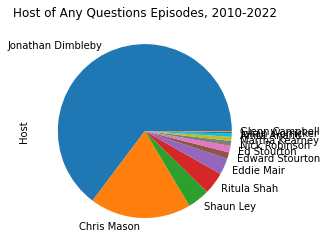

In [229]:
host_stats = episodeDetails['Host'].value_counts()

# create the pie chart
ax = host_stats.plot(kind='pie')
# set the title
ax.set_title("Host of Any Questions Episodes, 2010-2022")

In [189]:
#episodeDetails['Name Count'] = episodeDetails.apply(lambda row : len(row['Names List']), axis = 1)